In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import os
import shutil
import kagglehub
rm1000_grape_disease_dataset_original_path = kagglehub.dataset_download('rm1000/grape-disease-dataset-original')

print('Data source import complete.')


100%|██████████| 151M/151M [00:10<00:00, 14.9MB/s]

Extracting files...


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(rm1000_grape_disease_dataset_original_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/root/.cache/kagglehub/datasets/rm1000/grape-disease-dataset-original/versions/1/Original Data/train/Healthy/4b837c0f-15e7-4896-9a4c-2f5ea9fbb5de___Mt.N.V_HL 6195.JPG
/root/.cache/kagglehub/datasets/rm1000/grape-disease-dataset-original/versions/1/Original Data/train/Healthy/41506a32-a472-4ca3-a8e0-4980c179096b___Mt.N.V_HL 6206_new30degFlipLR.JPG
/root/.cache/kagglehub/datasets/rm1000/grape-disease-dataset-original/versions/1/Original Data/train/Healthy/21abfc5f-c711-4732-8049-b85fd60180a2___Mt.N.V_HL 9035_180deg.JPG
/root/.cache/kagglehub/datasets/rm1000/grape-disease-dataset-original/versions/1/Original Data/train/Healthy/f207869a-fff0-4339-9910-f381524c4599___Mt.N.V_HL 9125_new30degFlipLR.JPG
/root/.cache/kagglehub/datasets/rm1000/grape-disease-dataset-original/versions/1/Original Data/train/Healthy/8bd312c9-5a9c-4ac7-ae60-cbc2600a23aa___Mt.N.V_HL 6128.JPG
/root/.cache/kagglehub/datasets/rm1000/grape-disease-dataset-original/versions/1/

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random


In [3]:
# Veri dönüşümleri (normalizasyon ve boyutlandırma)
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),  # ResNet giriş boyutu
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalizasyon
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


# Veri setlerinin bulunduğu dizin
data_dir = '/root/.cache/kagglehub/datasets/rm1000/grape-disease-dataset-original/versions/1/Original Data'

# Veri setini yükleme
image_datasets = {
    'train': datasets.ImageFolder(os.path.join(data_dir, 'train'), data_transforms['train']),
    'test': datasets.ImageFolder(os.path.join(data_dir, 'test'), data_transforms['test'])
}

# DataLoader kullanarak veri setini yükleme
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=32, shuffle=True, num_workers=4),
    'test': DataLoader(image_datasets['test'], batch_size=32, shuffle=False, num_workers=4)
}

# Sınıf sayısı
class_names = image_datasets['train'].classes
num_classes = len(class_names)

print(f"Class names: {class_names}")


Class names: ['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight']


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# ResNet18 modelini yükleyin ve önceden eğitilmiş (pretrained) ağırlıkları kullanın
model = models.resnet18(pretrained=True)

# Son katmanı yeniden yapılandırın (ResNet'in son katmanı 1000 sınıf için tasarlanmış)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

# Modeli GPU'ya taşıyın (varsa)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Kayıp fonksiyonu ve optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 102MB/s]


In [4]:
# Google Drive'ı mount et
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Modeli kaydetme fonksiyonu
def save_model(model, file_name='resnet_model2.pth'):
    save_path = f'/content/drive/MyDrive/{file_name}'
    torch.save(model.state_dict(), save_path)
    print(f"Model '{file_name}' Drive'a kaydedildi.")

# Eğitim fonksiyonu
def train_model(model, criterion, optimizer, num_epochs=100):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    save_model(model)
    return model

# Modeli eğit
trained_model = train_model(model, criterion, optimizer, num_epochs=100)


Epoch 1/100
----------
train Loss: 0.0139 Acc: 0.9957
test Loss: 0.0610 Acc: 0.9839
Epoch 2/100
----------
train Loss: 0.0133 Acc: 0.9963
test Loss: 0.0036 Acc: 0.9994
Epoch 3/100
----------
train Loss: 0.0017 Acc: 0.9993
test Loss: 0.0185 Acc: 0.9939
Epoch 4/100
----------
train Loss: 0.0186 Acc: 0.9957
test Loss: 0.0029 Acc: 0.9983
Epoch 5/100
----------
train Loss: 0.0084 Acc: 0.9979
test Loss: 0.0296 Acc: 0.9900
Epoch 6/100
----------
train Loss: 0.0130 Acc: 0.9961
test Loss: 0.0106 Acc: 0.9978
Epoch 7/100
----------
train Loss: 0.0087 Acc: 0.9963
test Loss: 0.0078 Acc: 0.9972
Epoch 8/100
----------
train Loss: 0.0136 Acc: 0.9954
test Loss: 0.0017 Acc: 0.9994
Epoch 9/100
----------
train Loss: 0.0050 Acc: 0.9985
test Loss: 0.0012 Acc: 1.0000
Epoch 10/100
----------
train Loss: 0.0431 Acc: 0.9852
test Loss: 0.0046 Acc: 0.9983
Epoch 11/100
----------
train Loss: 0.0108 Acc: 0.9967
test Loss: 0.0010 Acc: 0.9994
Epoch 12/100
----------
train Loss: 0.0056 Acc: 0.9986
test Loss: 0.0079 A

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-13-cacfff8f176a>:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(load_path, map_location=device))


Model 'resnet_model2.pth' Drive'dan yüklendi.
Gerçek sınıf: Leaf Blight
Tahmin edilen sınıf: Leaf Blight (1.00 doğruluk)


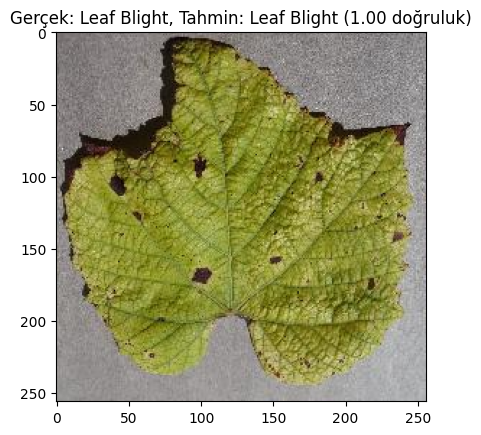

In [13]:
import torch
from torchvision import models, transforms
from PIL import Image
import os
import random
import matplotlib.pyplot as plt
import numpy as np

# GPU'yu kontrol et
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Google Drive'ı mount et
from google.colab import drive
drive.mount('/content/drive')

# ResNet modelini tanımla
model = models.resnet18(pretrained=False)  # Eğitilmemiş, sıfırdan başlayacak model
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 4)  # 4 sınıf varsa, son katmanı buna göre düzenleyin
model = model.to(device)

# Modeli Drive'dan yükleme fonksiyonu
def load_model(model, file_name='resnet_model2.pth'):
    load_path = f'/content/drive/MyDrive/{file_name}'
    model.load_state_dict(torch.load(load_path, map_location=device))
    model = model.to(device)
    model.eval()  # Modeli test moduna geçirin
    print(f"Model '{file_name}' Drive'dan yüklendi.")
    return model

# Modeli yükle
model = load_model(model, file_name='resnet_model2.pth')  # Kendi dosya adınızı girin

# Görüntü dönüşüm fonksiyonları
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Görüntüyü görselleştirmek için yardımcı fonksiyon
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Modelin bir görüntü üzerinde tahmin yapması için fonksiyon
def predict_image(image_path, model):
    image = Image.open(image_path)
    image = data_transforms(image).unsqueeze(0)
    image = image.to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)  # Softmax ile olasılıklar

    return preds.item(), probabilities

# Test dizininden rastgele bir görüntü seç ve tahmin yap
data_dir = '/root/.cache/kagglehub/datasets/rm1000/grape-disease-dataset-original/versions/1/Original Data/test'
all_classes = os.listdir(data_dir)

# Tüm sınıflardan görüntüleri listele
test_images = []
for class_name in all_classes:
    class_path = os.path.join(data_dir, class_name)
    images_in_class = os.listdir(class_path)
    for img_name in images_in_class:
        test_images.append((os.path.join(class_path, img_name), class_name))

# Test setinden rastgele bir görüntü seç
random_image_path, true_label = random.choice(test_images)

# Tahmini alın ve olasılıkları hesaplayın
predicted_label_idx, probabilities = predict_image(random_image_path, model)
class_names = ['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight'] # Sınıfları buraya yazın
predicted_label = class_names[predicted_label_idx]
predicted_prob = probabilities[0, predicted_label_idx].item()  # Tahmin edilen sınıfın olasılığı

# Gerçek ve tahmin edilen sınıfı yazdır
print(f"Gerçek sınıf: {true_label}")
print(f"Tahmin edilen sınıf: {predicted_label} ({predicted_prob:.2f} doğruluk)")

# Görüntüyü görselleştir
image = Image.open(random_image_path)
plt.imshow(image)
plt.title(f"Gerçek: {true_label}, Tahmin: {predicted_label} ({predicted_prob:.2f} doğruluk)")
plt.show()
